In [110]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [76]:
df.shape

(119390, 32)

In [77]:
df_hotel=df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [78]:
df_hotel.shape

(119390, 16)

In [79]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

In [80]:
df['is_canceled'].value_counts()
# jumlah orang cancel dan tidak cancel

0    75166
1    44224
Name: is_canceled, dtype: int64

In [81]:
df_hotel.corr()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.060017,0.005048,-0.032491,-0.144381,0.054186,-0.195498,-0.234658
adults,0.060017,1.000000,0.030447,0.018146,-0.051673,-0.008283,0.014785,0.122884
children,0.005048,0.030447,1.000000,0.024030,0.048949,-0.033273,0.056253,0.081745
babies,-0.032491,0.018146,0.024030,1.000000,0.083440,-0.010621,0.037383,0.097889
booking_changes,-0.144381,-0.051673,0.048949,0.083440,1.000000,-0.011634,0.065620,0.052833
days_in_waiting_list,0.054186,-0.008283,-0.033273,-0.010621,-0.011634,1.000000,-0.030600,-0.082730
required_car_parking_spaces,-0.195498,0.014785,0.056253,0.037383,0.065620,-0.030600,1.000000,0.082626
total_of_special_requests,-0.234658,0.122884,0.081745,0.097889,0.052833,-0.082730,0.082626,1.000000


In [82]:
df_hotel.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,119390,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000
unique,2,NaN,NaN,NaN,NaN,5,177,8,5,10,NaN,3,NaN,4,NaN,NaN
top,City Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,79330,NaN,NaN,NaN,NaN,92310,48590,56477,97870,85994,NaN,104641,NaN,89613,NaN,NaN
mean,NaN,0.370416,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,NaN,0.221124,NaN,2.321149,NaN,0.062518,0.571363
std,NaN,0.482918,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,NaN,0.652306,NaN,17.594721,NaN,0.245291,0.792798
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.000000


## Value indicating if the booking was canceled (1) or not (0)

# EDA

In [137]:
df_hotel['total_guests'] = df_hotel['adults']+ df_hotel['children']+ df_hotel['babies']

# viewing most common group type
df_hotel.groupby(['total_guests']).size().sort_values(ascending=False)

total_guests
2.0     82048
1.0     22581
3.0     10494
4.0      3929
0.0       180
5.0       137
26.0        5
27.0        2
20.0        2
12.0        2
10.0        2
55.0        1
50.0        1
40.0        1
6.0         1
dtype: int64

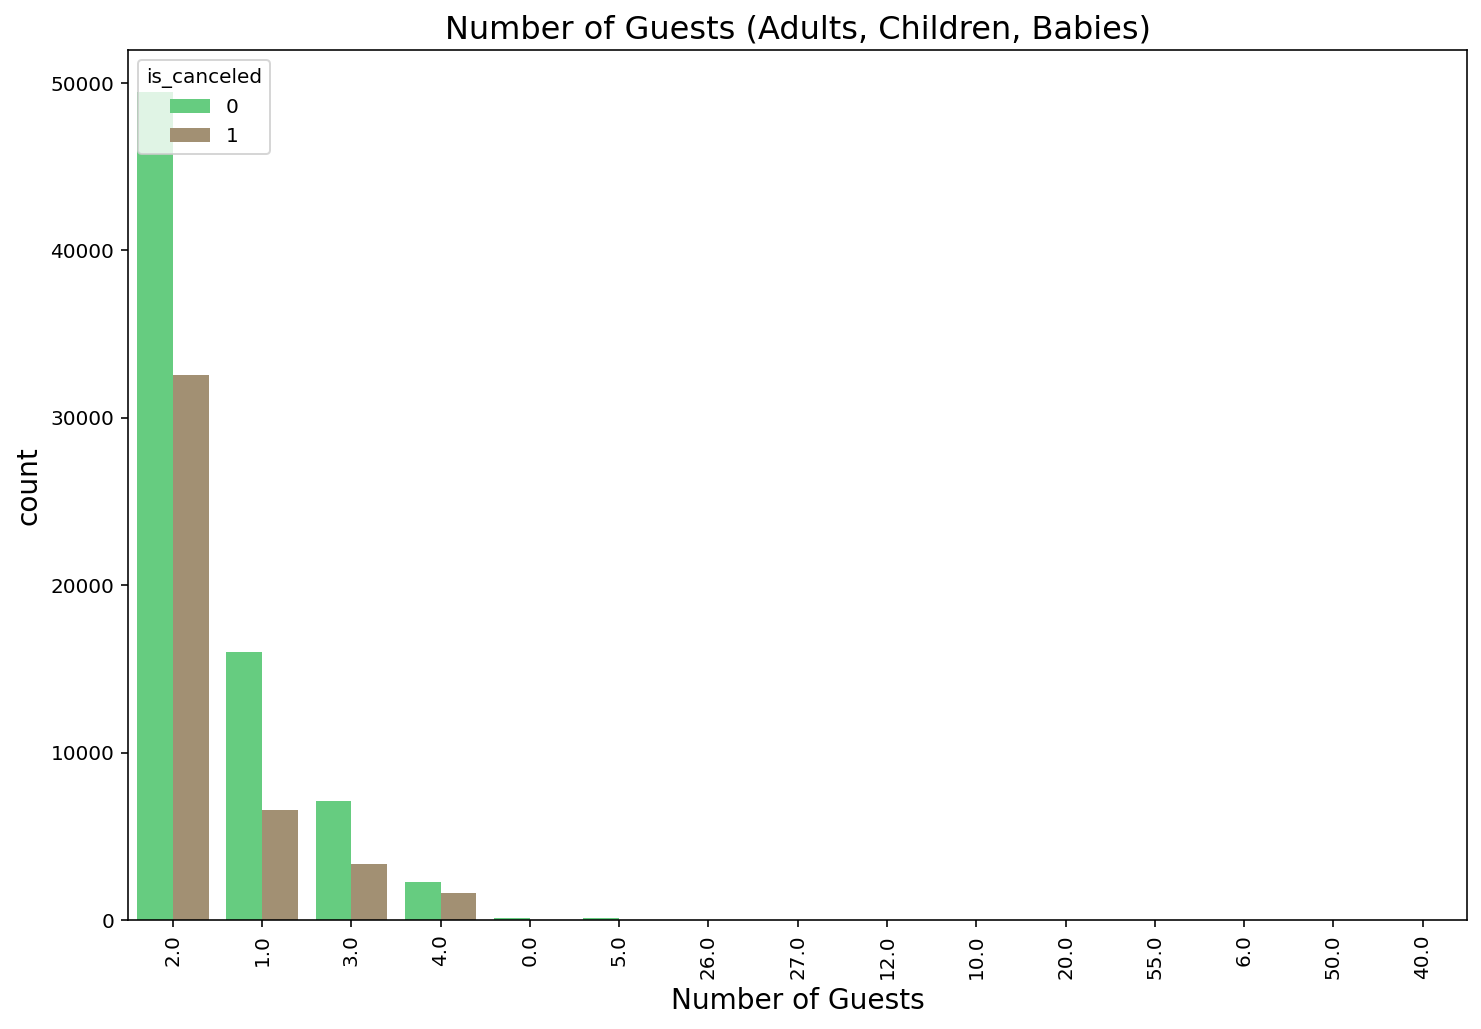

In [142]:
# creating a graph for the number of people with a histogram
plt.figure(figsize = (12, 8))
sns.countplot(x = 'total_guests', data = df_hotel,palette = 'terrain',hue='is_canceled',order = df_hotel['total_guests'].value_counts().head(15).index)
plt.xticks(rotation = 90)
plt.title('Number of Guests (Adults, Children, Babies)', fontsize = 16)
plt.ylabel('count', fontsize = 14)
plt.xlabel('Number of Guests', fontsize = 14)
plt.show()


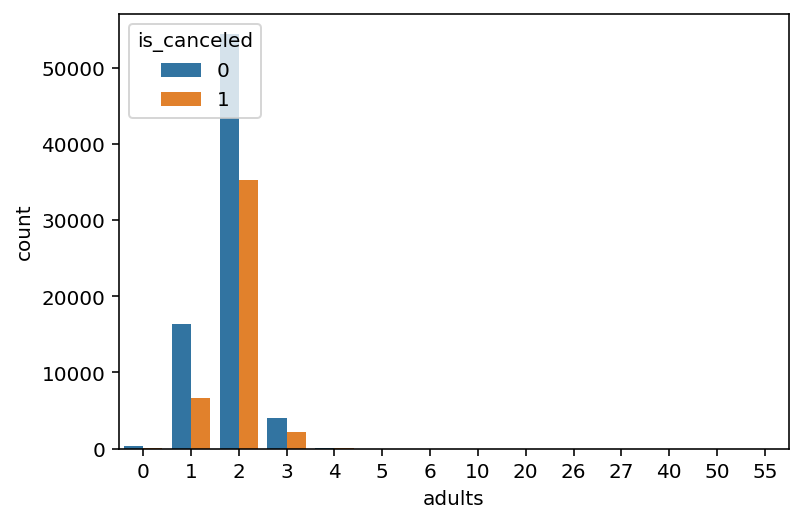

In [83]:
sns.countplot(x='adults',data=df_hotel,hue='is_canceled')
#menunjukan bahwa kalo adullts yang berpasangaan adalah majoriy data dan 

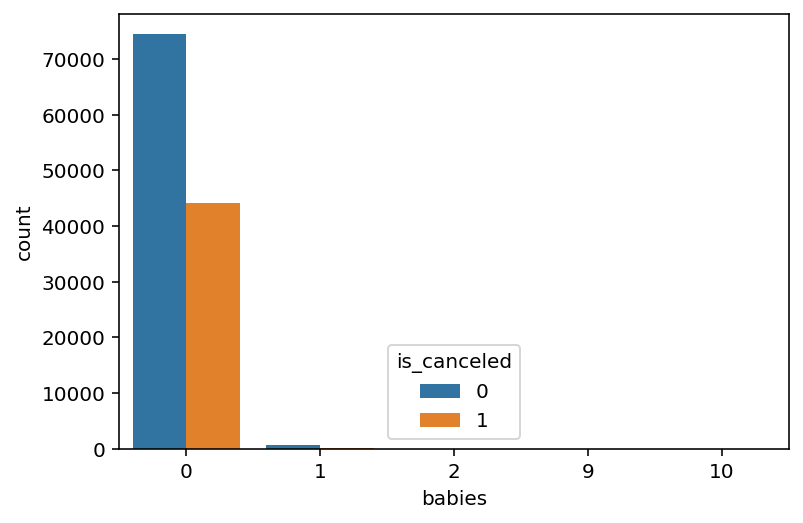

In [84]:
sns.countplot(x='babies',data=df_hotel,hue='is_canceled')

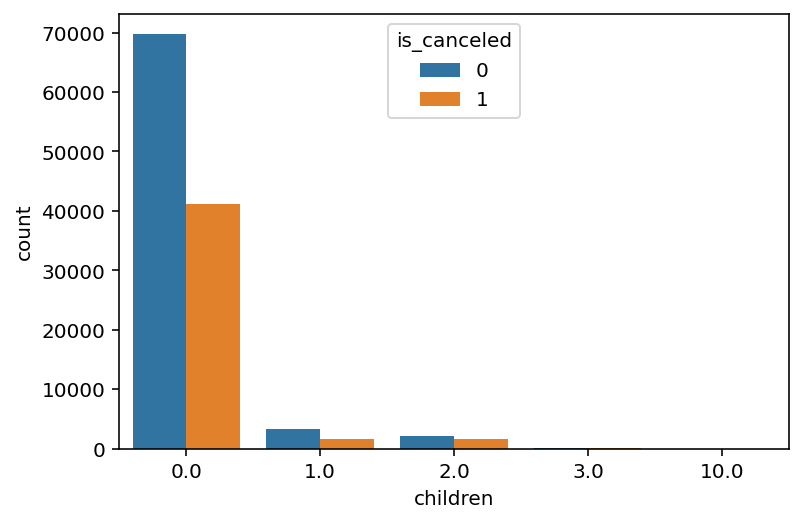

In [86]:
sns.countplot(x='children',data=df_hotel,hue='is_canceled')

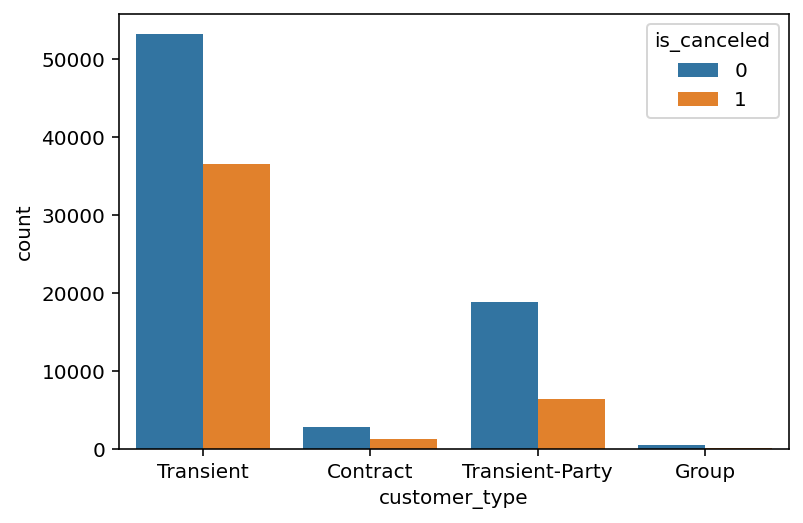

In [87]:
sns.countplot(x='customer_type',data=df_hotel,hue='is_canceled')

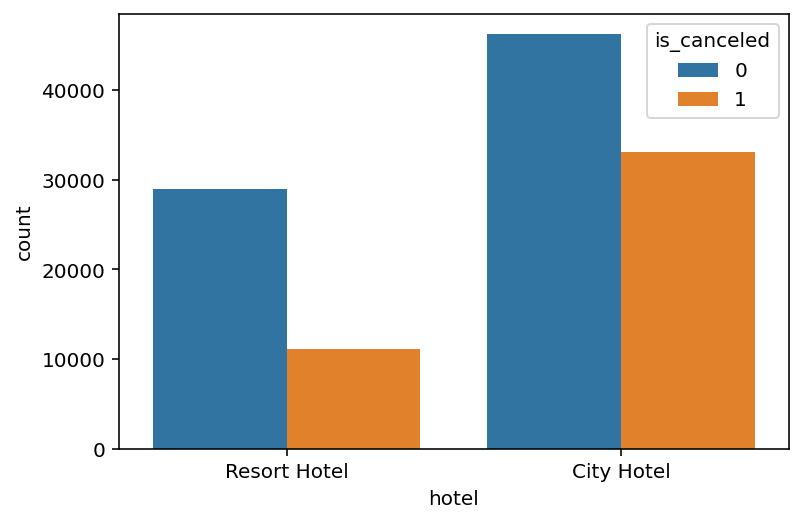

In [88]:
sns.countplot(x='hotel',data=df_hotel,hue='is_canceled')

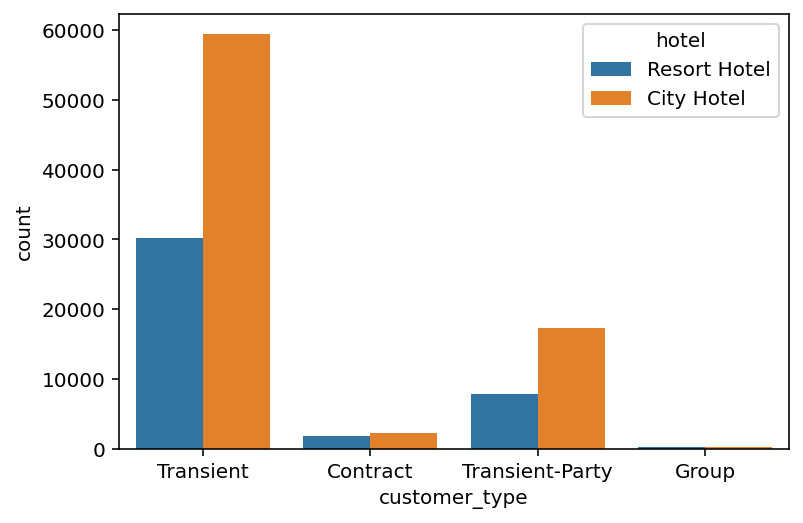

In [144]:
sns.countplot(x='customer_type',data=df_hotel,hue='hotel')

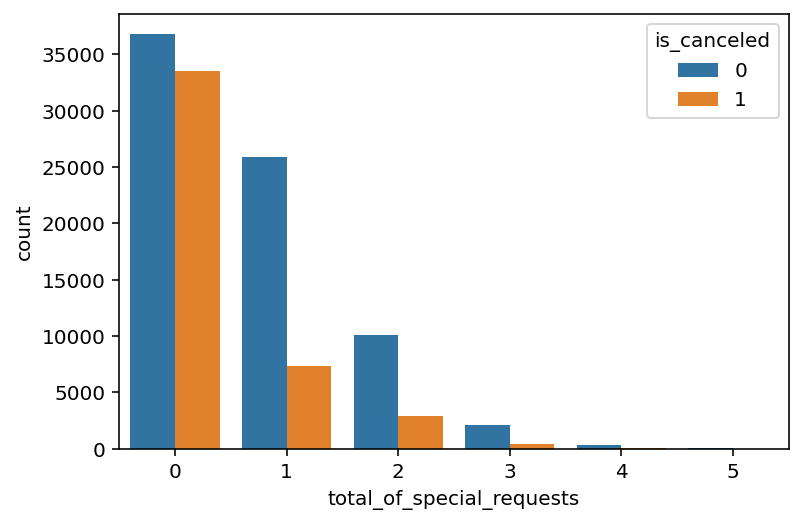

In [89]:
sns.countplot(x='total_of_special_requests',data=df_hotel,hue='is_canceled')

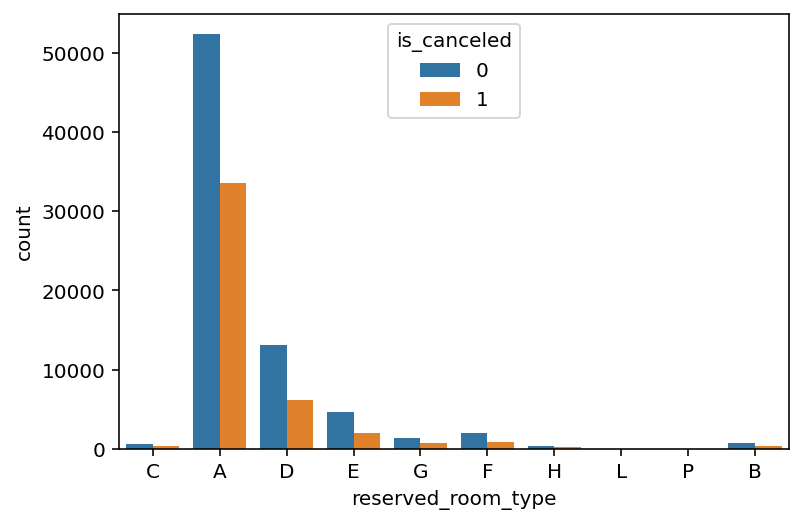

In [90]:
sns.countplot(x='reserved_room_type',data=df_hotel,hue='is_canceled')

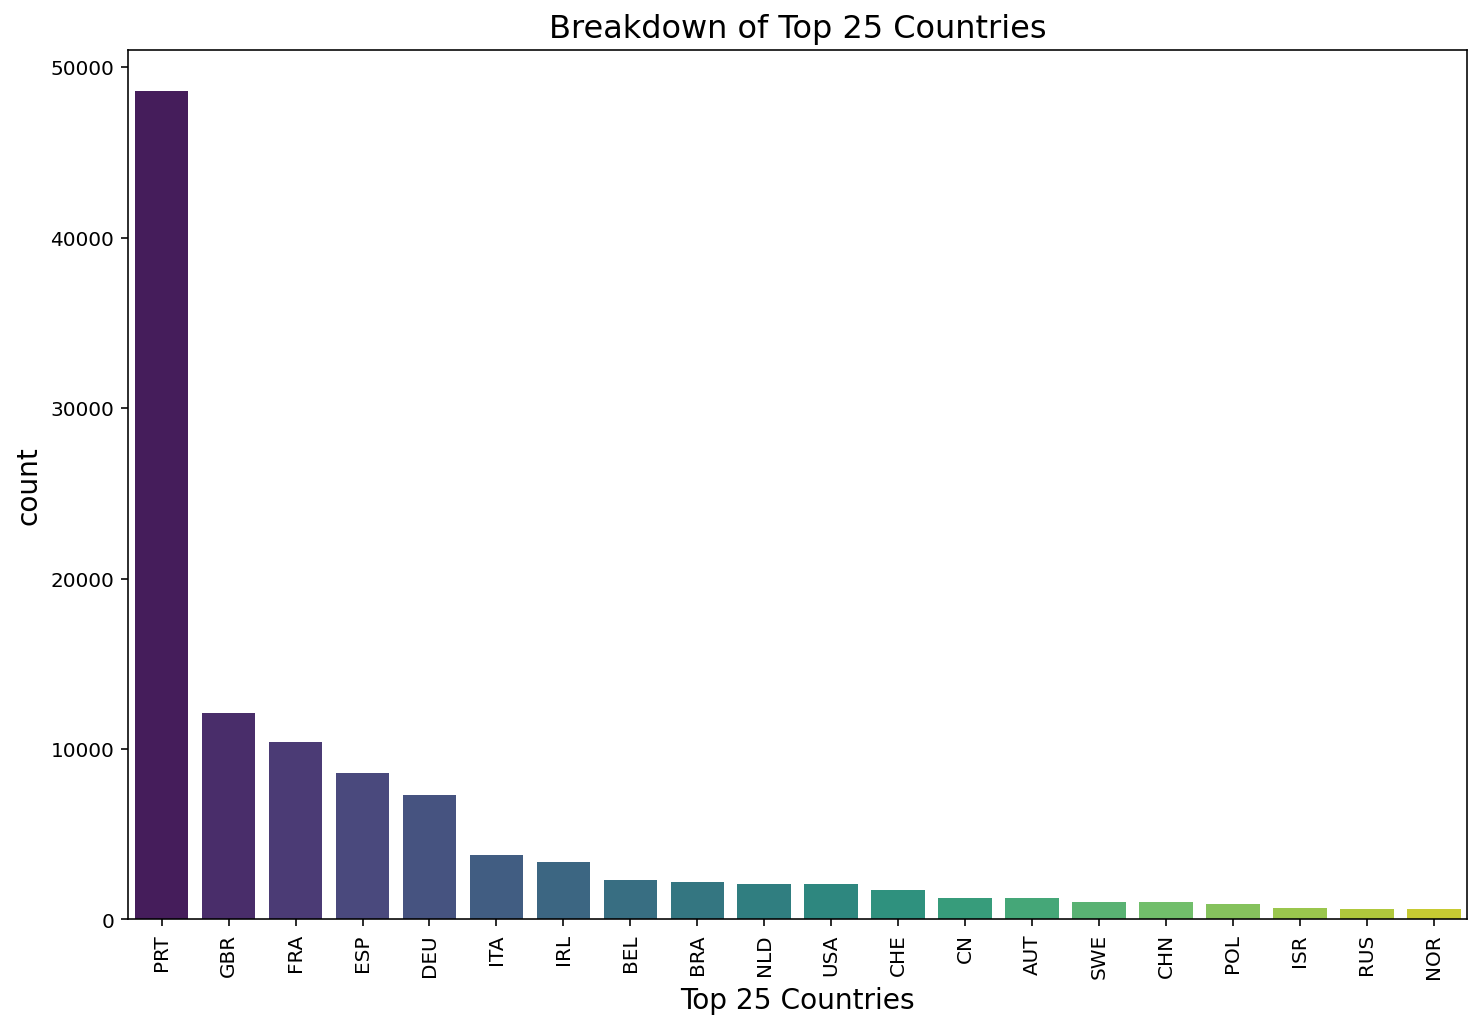

In [111]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'country', data = df_hotel, palette = 'viridis', order = df_hotel['country'].value_counts().head(20).index)
plt.xticks(rotation = 90)
plt.title('Breakdown of Top 25 Countries', fontsize = 16)
plt.ylabel('count', fontsize = 14)
plt.xlabel('Top 25 Countries', fontsize = 14)
plt.show()

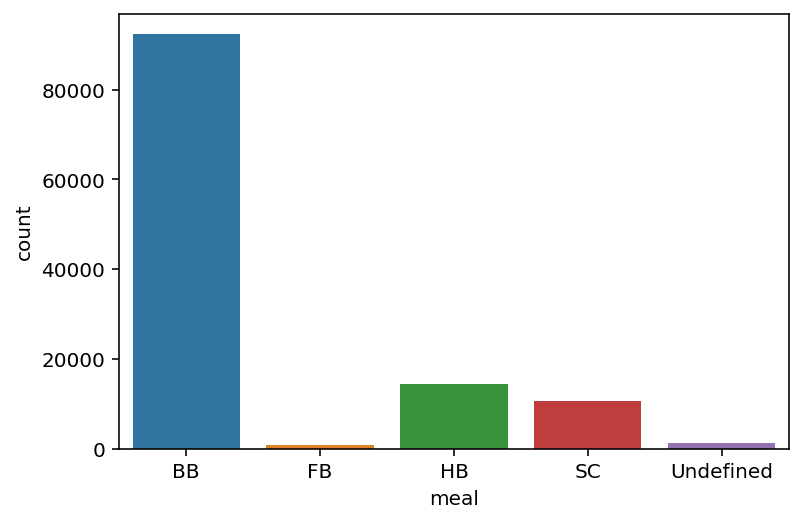

In [183]:
sns.countplot(x='meal',data=df_hotel)

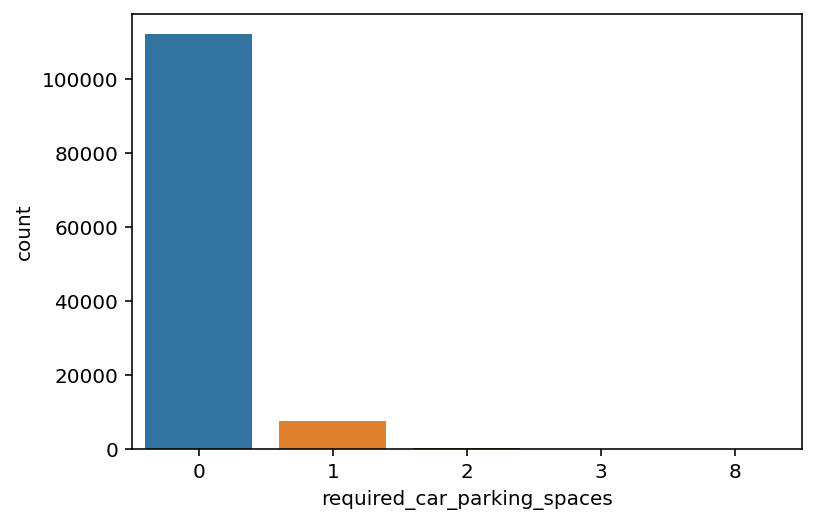

In [184]:
sns.countplot(x='required_car_parking_spaces',data=df_hotel)

Dari EDA Simple di atas disimpulkan bahwa:

>* Data target balance karena canceled dan not canceled nya tidak beda jauh dengan ratio 1:2.

>* Tujuan model ini adalah model classification

>* Trendnya menunjukan bahwa majority reservasi adalah buat 2 orang. dan kedua paling banyak adalah buat 1 orang.

>* kebanyakan dewasa pergi ke hotel berpasangan dan mayoritas tidak mempunyak anak atau bayi

>* mayoritas customer pergi ke hotel untuk sementara doang mungkin untuk business travel atau untuk berpesta sementara

>* mayoritas customer pergi ke city hotel dari pd resort hotel

>* mayoritas customer memilih reserved room type A dibanding room type yang lain

>* Graphnya menunjukan bahwa reservasi mayoritas dibuat dari negara Portugal. Namun, ada penurunan besar ke negara terpopuler kedua.
Bilah perlahan berkurang setelah negara terpopuler kedua. 

>* Mayoritas Customer suka meal 'BB'

>* Mayoritas customer tidak peduli dengan car parking space

 # Data Cleaning & Preprocessing

In [157]:
df_hotel.drop('total_guests',axis=1,inplace=True)

In [158]:
df_hotel.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
adults,2,2,1,1,2
children,0,0,0,0,0
babies,0,0,0,0,0
meal,BB,BB,BB,BB,BB
country,PRT,PRT,GBR,GBR,GBR
market_segment,Direct,Direct,Direct,Corporate,Online TA
distribution_channel,Direct,Direct,Direct,Corporate,TA/TO
reserved_room_type,C,C,A,A,A


In [159]:
# library untuk preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [160]:
# melihat missing value dalam percentage
df_hotel.isna().sum()/df.shape[0]*100

hotel                          0.000000
is_canceled                    0.000000
adults                         0.000000
children                       0.003350
babies                         0.000000
meal                           0.000000
country                        0.408744
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

In [161]:
df_hotel.isna().sum()

hotel                            0
is_canceled                      0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
reserved_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

In [185]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['hotel','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']),
    ('binary encoder',binary_encoder_pipeline,['country']),
    ('fill_age', SimpleImputer(strategy='mean'),['children']), 
], remainder='passthrough')

>* binary_encoder_pipeline digunakan untuk mengisi missing value di country dan diberubahkan kepada NC dan mengubah feature menjadi data binari, jumlah kolom baru disesuaikan dengan digit angka binari tertinggi setelah encoding

>* saya mengunakan binary encoding kepada country dataset karena menurut saya country dataset mempunyai kategori yang banyak dan paling cocok digunakan binary.

>* saya mengunakan OneHotEncoder kepada ['hotel','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'] karena sy merasa datanya nominal maupun ordinal, yang isi kategorinya tidak terlalu banyak.

# Splitting Data

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X = df_hotel.drop(['is_canceled'], axis=1)
y = df_hotel['is_canceled']

In [188]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    random_state=2020)

# Select Benchmark

In [121]:
#library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [122]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier()]]

In [123]:
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        estimator=Pipeline([('preprocess',transformer),('model',model)])

        skfold= StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').mean())
        f1_std.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').std())

    return pd.DataFrame({
        'model': model_name,
        'f1_score':f1_score,
        'f1_std':f1_std
        })


mengunakan f1-score karena  problem yang kita ingin solve adalah:

>* Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan. (FN)

>* Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan). (FP)

Dalam konteks bisnis perhotelan, apabila pengunjung diasumsikan tidak cancel booking maka pihak hotel akan menyiapkan beberapa hal untuk menyambut kedatangan mereka, di antaranya:

>* Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,

>* Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,

>* Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,

>* Menolak pengunjung lain yang memesan kamar yang telah dipesan (booked room)

>* Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan.

Kita akan mencoba increase accuracy kepada f1_score supaya customer hotel yang kita prediksi cancel dan ternyata tidak cancel kita bisa mempersiapkan kamarnya.

In [124]:
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,0.628459,0.005843
1,DecisionTree,0.730916,0.001919
2,RandomForest,0.738866,0.002259
3,KNeighbours,0.712006,0.003164


> mengunakan random forest karena, randomforest mempunyai f1_score tertinggi dan std terendah

In [128]:
#check benchmark preformance against test data
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)
f1_score(y_test, estimator.predict(X_test))

0.7459510027480559

# Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [163]:
df_hotel.shape[0]**.5

345.5285805834302

In [114]:
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}

In [115]:
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                         

In [117]:
# Parameter terbaik yang akan digunakan
grid.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 7,
 'model__min_samples_leaf': 50,
 'model__min_samples_split': 15}

>* model__criterion: 'gini' adalah ukuran yang coba diminimalkan oleh pohon keputusan saat memisahkan setiap node. Merepresentasikan probabilitas bahwa sampel yang dipilih secara acak dari sebuah node akan salah diklasifikasikan menurut distribusi sampel di node tersebut. 

>* max_depth adalah pohon di Random Forest didefinisikan sebagai jalur terpanjang antara simpul akar dan simpul daun: Dengan menggunakan parameter max_depth, saya dapat membatasi sampai seberapa dalam saya ingin setiap pohon di hutan acak saya tumbuh 

>* min_samples_leaf adalah Jumlah minimum sampel yang diperlukan untuk berada di node daun. Parameter ini mirip dengan min_samples_splits, namun, ini menjelaskan jumlah sampel minimum di daun, di pangkal pohon. 

>* min_samples_split = jumlah min dari titik data yang ditempatkan dalam sebuah node sebelum node tersebut dipisahkan. min_samples_leaf = jumlah minimum titik data yang diizinkan dalam node daun.

In [118]:
grid.best_score_

0.5927864471137388

In [119]:
# evaluasi best estimator ke test data

grid.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

# score turun setelah pakai hyperparameter tuning

0.6005123568414708

# Improve model using feature selection by reducing feature (Boosting)

In [217]:
from sklearn.ensemble import AdaBoostClassifier

In [192]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 10)

In [193]:
X_train_val_preprocessed=transformer.fit_transform(X_train_val)
X_test_preprocessed= transformer.transform(X_test)

In [202]:
X_train_val_preprocessed = pd.DataFrame(X_train_val_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_val_preprocessed

,x0_Resort Hotel,x1_FB,x1_HB,x1_SC,x1_Undefined,x2_Complementary,x2_Corporate,x2_Direct,x2_Groups,x2_Offline TA/TO,...,0_6,0_7,0_8,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
89538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89539,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
89540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0


In [203]:
transformer.transformers_

[('one_hot',
  OneHotEncoder(drop='first'),
  ['hotel',
   'meal',
   'market_segment',
   'distribution_channel',
   'reserved_room_type',
   'deposit_type',
   'customer_type']),
 ('binary encoder',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary encoder', BinaryEncoder())]),
  ['country']),
 ('fill_age', SimpleImputer(), ['children']),
 ('remainder', 'passthrough', [1, 3, 9, 11, 13, 14])]

In [204]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Resort Hotel', 'x1_FB', 'x1_HB', 'x1_SC', 'x1_Undefined',
       'x2_Complementary', 'x2_Corporate', 'x2_Direct', 'x2_Groups',
       'x2_Offline TA/TO', 'x2_Online TA', 'x2_Undefined', 'x3_Direct',
       'x3_GDS', 'x3_TA/TO', 'x3_Undefined', 'x4_B', 'x4_C', 'x4_D',
       'x4_E', 'x4_F', 'x4_G', 'x4_H', 'x4_L', 'x4_P', 'x5_Non Refund',
       'x5_Refundable', 'x6_Group', 'x6_Transient', 'x6_Transient-Party'],
      dtype=object)

In [205]:
transformer.transformers_[1][1]['binary encoder'].get_feature_names()

['0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8']

In [206]:
df_hotel.corr()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.060017,0.005048,-0.032491,-0.144381,0.054186,-0.195498,-0.234658
adults,0.060017,1.000000,0.030447,0.018146,-0.051673,-0.008283,0.014785,0.122884
children,0.005048,0.030447,1.000000,0.024030,0.048949,-0.033273,0.056253,0.081745
babies,-0.032491,0.018146,0.024030,1.000000,0.083440,-0.010621,0.037383,0.097889
booking_changes,-0.144381,-0.051673,0.048949,0.083440,1.000000,-0.011634,0.065620,0.052833
days_in_waiting_list,0.054186,-0.008283,-0.033273,-0.010621,-0.011634,1.000000,-0.030600,-0.082730
required_car_parking_spaces,-0.195498,0.014785,0.056253,0.037383,0.065620,-0.030600,1.000000,0.082626
total_of_special_requests,-0.234658,0.122884,0.081745,0.097889,0.052833,-0.082730,0.082626,1.000000


In [207]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names() + ['adults','children',	'babies',	'booking_changes',	'days_in_waiting_list',	'required_car_parking_spaces',	'total_of_special_requests']
X_train_val_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_val_preprocessed

,x0_Resort Hotel,x1_FB,x1_HB,x1_SC,x1_Undefined,x2_Complementary,x2_Corporate,x2_Direct,x2_Groups,x2_Offline TA/TO,...,0_6,0_7,0_8,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
89538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89539,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
89540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0


In [208]:
model = RandomForestClassifier(max_depth = 7,min_samples_leaf=50,min_samples_split=15)
model.fit(X_train_val_preprocessed, y_train_val)

RandomForestClassifier(max_depth=7, min_samples_leaf=50, min_samples_split=15)

In [209]:
y_pred = model.predict(X_test_preprocessed)
print('classification_report:',classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.75      0.97      0.84     18792
           1       0.90      0.44      0.59     11056

    accuracy                           0.77     29848
   macro avg       0.82      0.70      0.72     29848
weighted avg       0.80      0.77      0.75     29848



In [210]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [211]:
importance_table

,imp
x0_Resort Hotel,0.014323
x1_FB,0.000729
x1_HB,0.001036
x1_SC,0.001659
x1_Undefined,0.000756
x2_Complementary,0.000172
x2_Corporate,0.005351
x2_Direct,0.018229
x2_Groups,0.069208
x2_Offline TA/TO,0.023618


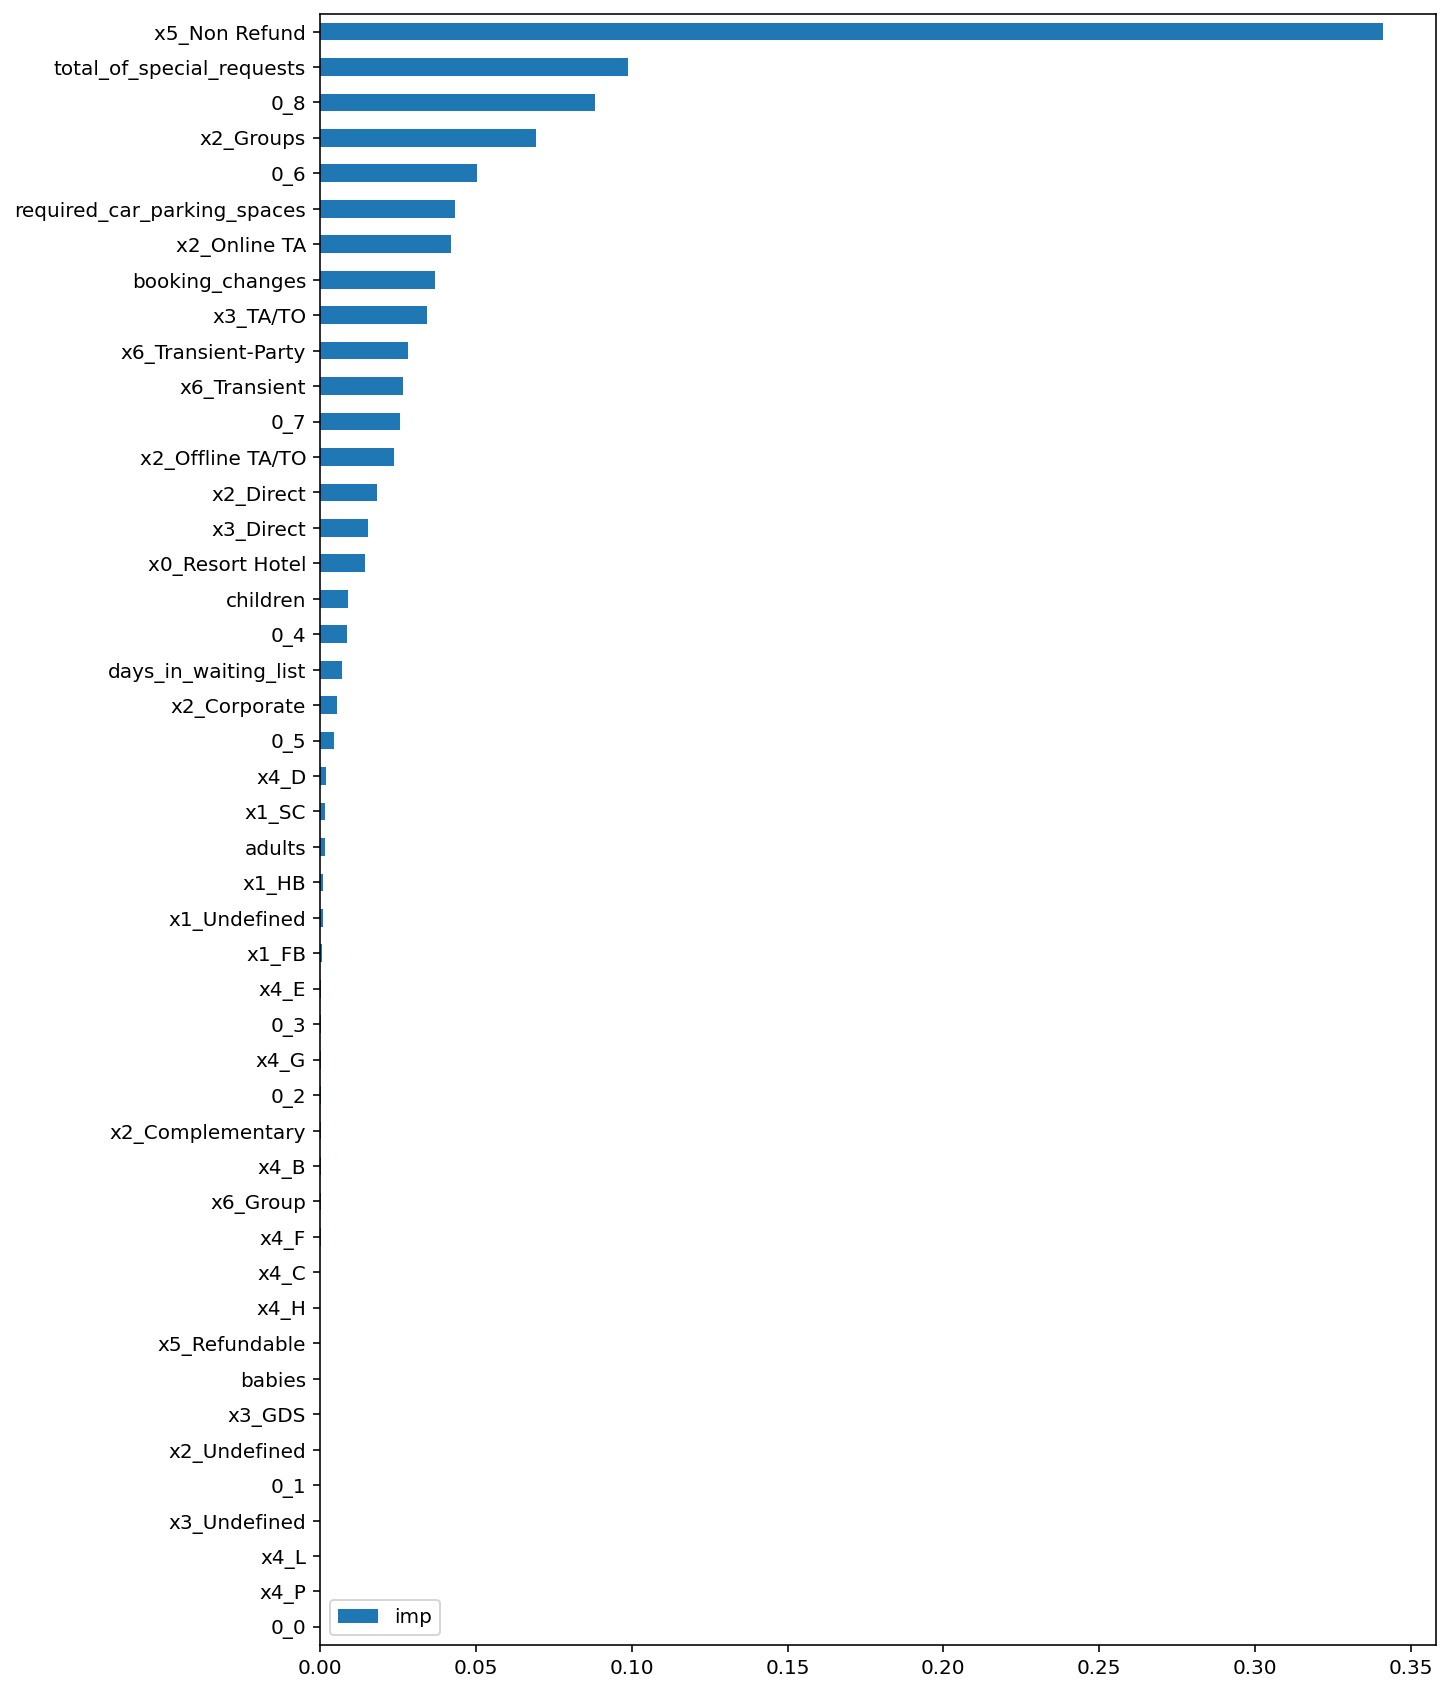

In [212]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

In [ ]:
rf = RandomForestClassifier(max_depth = 7,min_samples_leaf=50,min_samples_split=15)
model= AdaBoostClassifier(rf,
    n_estimators=200,
    learning_rate=0.1,
    random_state=10)
model.fit(X_train_val_preprocessed,y_train_val)

In [ ]:
y_pred=model.predict(X_test_preprocessed)
print('classification_report:', classification_report(y_test,y_pred))